# An analysis framework for diabetes complecation predictions.

## Case 2: Predict the Immunoglobulin A Nephropathy risk for diabetes patients

In [1]:
from DiabetesComplecationPrediction.datasets import *
from DiabetesComplecationPrediction.preprocessing import *
from DiabetesComplecationPrediction.trained_model import SVMModel, RFModel, CatBoostModel

### Load the data

In [2]:
df_igan = diabetes_IgAN_risk()

In [3]:
df_igan.head()

,Age,Sex,Body height at 0M,Waist circumstances at 0M,Duration of T2DM,Smoking habit,Drinking habit,History of complications,History of hypertension,History of dyslipidemia,...,Urinary sugar at 3M,Urinary sugar at 12M,Urinary albumin/creatinine ratio at 0M,Urinary albumin/creatinine ratio at 3M,Urinary albumin/creatinine ratio at 12M,eGFR at 0M,eGFR at 1M,eGFR at 3M,eGFR at 12M,Risk of Nephropathy
0,61.0,1.0,170.0,101.0,72.0,0.0,0.0,1.0,1.0,1.0,...,NaN,0.0,53.3,NaN,6.4,55.940643,52.670513,50.686818,61.643003,0.0
1,42.0,1.0,184.0,NaN,36.0,2.0,0.0,1.0,0.0,1.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,64.0,1.0,169.0,NaN,168.0,2.0,0.0,1.0,0.0,1.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,57.0,1.0,168.5,NaN,144.0,2.0,1.0,1.0,1.0,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,63.0,2.0,151.0,88.5,72.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,30.0,27.1,56.6,77.754106,87.433453,89.274571,83.961202,1.0


In [4]:
df_igan.isnull().sum()

Age                             1
Sex                             1
Body height  at 0M             14
Waist circumstances at 0M     312
Duration of T2DM               66
                             ... 
eGFR at 0M                     89
eGFR at 1M                    136
eGFR at 3M                    135
eGFR at 12M                   155
Risk of Nephropathy             1
Length: 165, dtype: int64

### Check the missing rate

In [5]:
del_feature = Del_Feature()

In [6]:
igan_missing = del_feature.missing_rate(df_igan)
igan_missing

,missing_rate
Proinsulin/Insulin at 12M,78.305520
Insulin at 12M.1,77.920411
CPI at 12M,77.920411
Proinsulin at 12M,77.920411
C-peptide at 12M,77.792041
...,...
History of myocardial infarction,0.128370
History of cerebral infarction,0.128370
History of angina pectoris,0.128370
History of heart failure,0.128370


### Plot the missing rate histogram

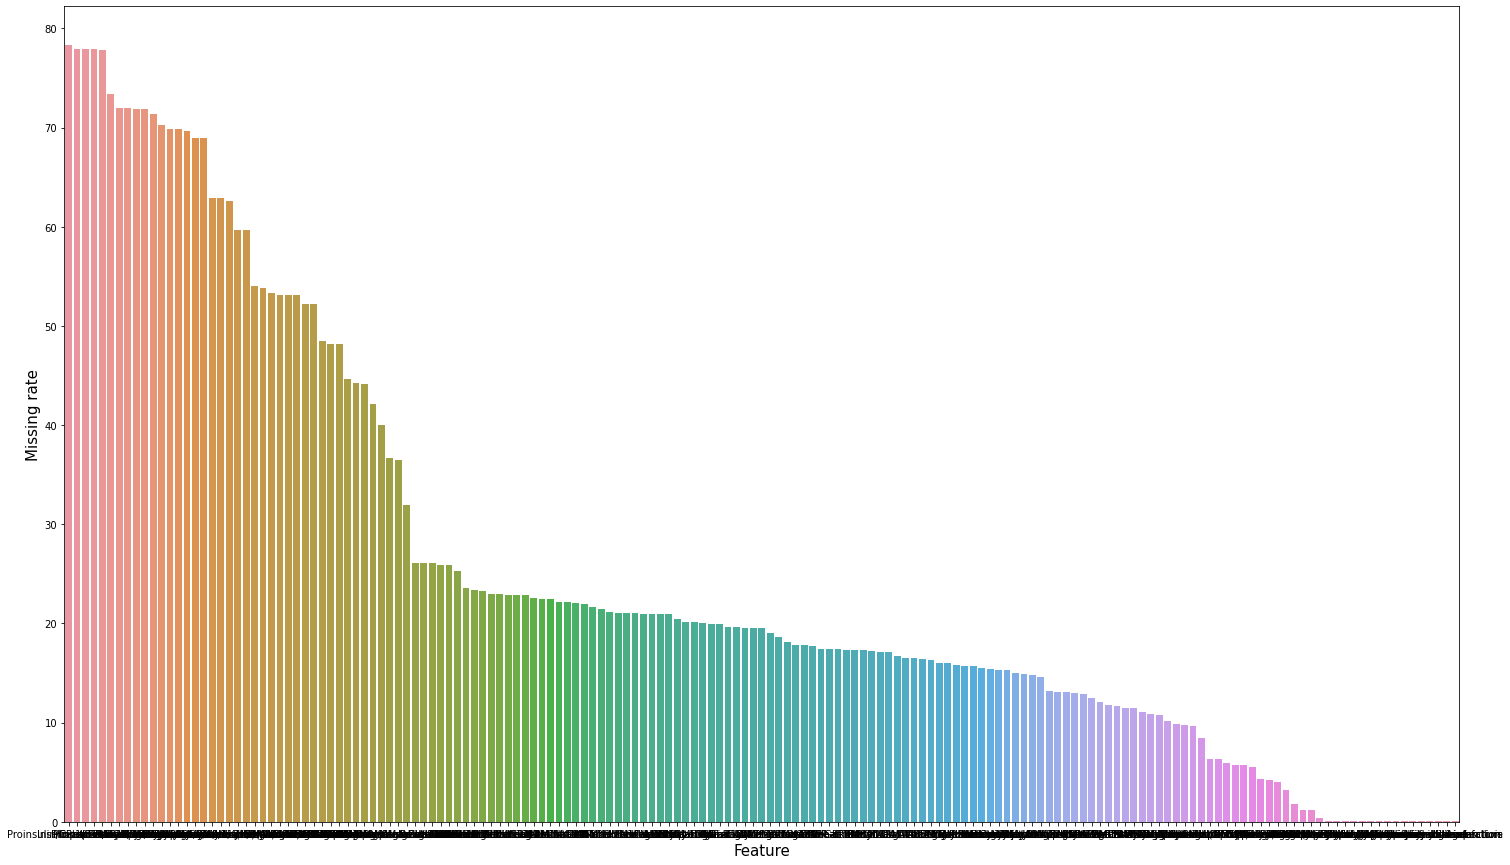

In [7]:
del_feature.missing_rate_hist(df_igan)

### Delete features with missing rate high than 30%

In [8]:
df_igan = del_feature.del_feature(df_igan, igan_missing)

In [9]:
df_igan.isnull().sum()

Age                      1
Sex                      1
Body height  at 0M      14
Duration of T2DM        66
Smoking habit           31
                      ... 
eGFR at 0M              89
eGFR at 1M             136
eGFR at 3M             135
eGFR at 12M            155
Risk of Nephropathy      1
Length: 124, dtype: int64

In [10]:
df_igan = df_igan[df_igan['Risk of Nephropathy'].notnull()]

### Inpute the rest missing values with mean

In [11]:
df_igan = normal_impute(df_igan)

In [12]:
df_igan.isnull().sum()

Age                    0
Sex                    0
Body height  at 0M     0
Duration of T2DM       0
Smoking habit          0
                      ..
eGFR at 0M             0
eGFR at 1M             0
eGFR at 3M             0
eGFR at 12M            0
Risk of Nephropathy    0
Length: 124, dtype: int64

### Generate feature list based on correlation

In [13]:
feature_igan = Feature(df_igan, 'Risk of Nephropathy')
feature_igan

In [14]:
feature_list_igan = feature_igan.feature_list()
feature_list_igan

['History of angina pectoris',
 'History of kidney disease',
 'Creatinine at 0M ',
 'Triglyceride at 3M',
 'Creatinine at 3M ',
 'Systolic blood pressure at 0M ',
 'History of hypertension',
 'Urinary protein at 1M',
 'History of retinopathy',
 'Triglyceride at 12M',
 'Systolic blood pressure at 12M ',
 'Creatinine at 1M ',
 'Age',
 'LDL-C at 12M',
 'BUN at 0M',
 'Urinary protein at 3M',
 'Urinary protein at 0M',
 'History of liver disease',
 'K at 12M',
 'BUN at 3M']

### Encode the target column

In [15]:
df_igan = encode_categ(df_igan, 'Risk of Nephropathy')

### Fit the catboost model

In [16]:
cb_igan = CatBoostModel(df_igan, 
                        feature_list_igan,
                        'Risk of Nephropathy')

In [17]:
igan_cb_model = cb_igan.trained_model()

Learning rate set to 0.007944
0:	learn: 0.6910357	total: 53.2ms	remaining: 53.2s
1:	learn: 0.6889297	total: 55ms	remaining: 27.5s
2:	learn: 0.6867428	total: 56.5ms	remaining: 18.8s
3:	learn: 0.6849612	total: 57.7ms	remaining: 14.4s
4:	learn: 0.6829054	total: 59ms	remaining: 11.7s
5:	learn: 0.6813273	total: 60.4ms	remaining: 10s
6:	learn: 0.6795248	total: 61.9ms	remaining: 8.78s
7:	learn: 0.6777095	total: 62.9ms	remaining: 7.8s
8:	learn: 0.6756381	total: 64.3ms	remaining: 7.08s
9:	learn: 0.6736360	total: 65.6ms	remaining: 6.49s
10:	learn: 0.6717331	total: 66.6ms	remaining: 5.99s
11:	learn: 0.6700207	total: 67.7ms	remaining: 5.57s
12:	learn: 0.6684900	total: 68.7ms	remaining: 5.22s
13:	learn: 0.6668045	total: 69.7ms	remaining: 4.91s
14:	learn: 0.6648766	total: 71ms	remaining: 4.66s
15:	learn: 0.6633282	total: 71.9ms	remaining: 4.42s
16:	learn: 0.6616933	total: 72.9ms	remaining: 4.21s
17:	learn: 0.6598592	total: 73.9ms	remaining: 4.03s
18:	learn: 0.6582947	total: 74.9ms	remaining: 3.87s
1

### Evaluate the catboost model

In [18]:
cb_igan_accu = cb_igan.model_accuracy()
cb_igan_accu

Learning rate set to 0.007944
0:	learn: 0.6910357	total: 1.2ms	remaining: 1.2s
1:	learn: 0.6889297	total: 2.6ms	remaining: 1.3s
2:	learn: 0.6867428	total: 4.29ms	remaining: 1.43s
3:	learn: 0.6849612	total: 5.53ms	remaining: 1.38s
4:	learn: 0.6829054	total: 7.16ms	remaining: 1.43s
5:	learn: 0.6813273	total: 8.66ms	remaining: 1.43s
6:	learn: 0.6795248	total: 10ms	remaining: 1.42s
7:	learn: 0.6777095	total: 11.1ms	remaining: 1.38s
8:	learn: 0.6756381	total: 12.5ms	remaining: 1.38s
9:	learn: 0.6736360	total: 14.1ms	remaining: 1.4s
10:	learn: 0.6717331	total: 15.4ms	remaining: 1.38s
11:	learn: 0.6700207	total: 17.2ms	remaining: 1.41s
12:	learn: 0.6684900	total: 18.2ms	remaining: 1.38s
13:	learn: 0.6668045	total: 19.2ms	remaining: 1.35s
14:	learn: 0.6648766	total: 20.2ms	remaining: 1.33s
15:	learn: 0.6633282	total: 21ms	remaining: 1.29s
16:	learn: 0.6616933	total: 22ms	remaining: 1.27s
17:	learn: 0.6598592	total: 22.9ms	remaining: 1.25s
18:	learn: 0.6582947	total: 23.8ms	remaining: 1.23s
19:

73.50427350427351

In [19]:
cb_igan_roc = cb_igan.roc(igan_cb_model)
cb_igan_roc

0.5730065905504502

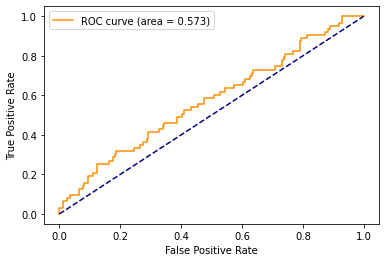

In [20]:
cb_igan.roc_plot(igan_cb_model)

### Predict using CatBoost model

In [21]:
igan_pre = load_csv('DiabetesComplecationPrediction/datasets/data/igan_exm.csv')
igan_pre = igan_pre.set_index(' ')

In [22]:
from DiabetesComplecationPrediction.information import IgAN_checker_csv

In [23]:
IgAN_checker_csv(igan_pre, 'CatBoost')

Learning rate set to 0.076715
0:	learn: 1.0498004	total: 8.8ms	remaining: 8.79s
1:	learn: 1.0119001	total: 11.6ms	remaining: 5.79s
2:	learn: 0.9771057	total: 14.1ms	remaining: 4.67s
3:	learn: 0.9437476	total: 16.6ms	remaining: 4.13s
4:	learn: 0.9145403	total: 20ms	remaining: 3.99s
5:	learn: 0.8885499	total: 21.7ms	remaining: 3.6s
6:	learn: 0.8656698	total: 24.6ms	remaining: 3.48s
7:	learn: 0.8448885	total: 26.8ms	remaining: 3.32s
8:	learn: 0.8234947	total: 28.9ms	remaining: 3.18s
9:	learn: 0.8061491	total: 30.9ms	remaining: 3.06s
10:	learn: 0.7890146	total: 33.8ms	remaining: 3.04s
11:	learn: 0.7723606	total: 36.3ms	remaining: 2.99s
12:	learn: 0.7588805	total: 38.8ms	remaining: 2.95s
13:	learn: 0.7452928	total: 40.7ms	remaining: 2.87s
14:	learn: 0.7329638	total: 43.1ms	remaining: 2.83s
15:	learn: 0.7215539	total: 45.2ms	remaining: 2.78s
16:	learn: 0.7104892	total: 47.3ms	remaining: 2.73s
17:	learn: 0.6996500	total: 49ms	remaining: 2.67s
18:	learn: 0.6897924	total: 49.6ms	remaining: 2.56

### Fit the random forest model

In [24]:
rf_igan = RFModel(df_igan,
                  feature_list_igan,
                  'Risk of Nephropathy')

In [25]:
rf_igan_model = rf_igan.trained_model()

### Evaluate the random forest model

In [26]:
rf_igan.model_accuracy()

73.07692307692307

In [27]:
rf_igan.roc()

0.6093750000000001

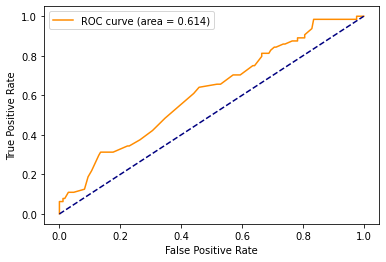

In [28]:
rf_igan.roc_plot()

### Predict using random forest model

In [29]:
IgAN_checker_csv(igan_pre, 'Random Forest') 

The risk of developing Nephropathy as complication of diabetes is low.
The accuracy of this prediction is 67.95%.
